In [1]:
from estnltk import Text

from estnltk.taggers import DateTagger
from pandas import read_csv
from estnltk.taggers import RegexTagger

In [2]:
with open("examples_.txt", "r") as fin:
    lines = fin.readlines()
lines = [line.strip() for line in lines]    

In [3]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [4]:
datetagger = DateTagger()
datetagger

In [5]:
vocabulary = 'regexes.csv'

In [6]:
vocabulary = read_csv(vocabulary, na_filter=False, index_col=False)

In [7]:
# ma tegelt kasutaks ridadel 17, 18, 20 ja 21 + asemel *, aga see annab assertionerrori, kui täägima hakkan :(

vocabulary

,_regex_pattern_,_group_,_priority_,normalized,regex_type,value
0,((K|k)olesteroo?l|KOLESTEROOL|(K|k)olester|Chol|(K|k)olest?|kol|chol|CHol|CHL|KOL|Kol|cHOL|CHOL|ÜK|ük|Ük),0,1,,measurement_object,kolesterool
1,((mmoo?l?i?|mm|MMOL|mol)(\s*[-/]\s*(L|l))?|MMOL/L),0,1,,unit,chol_unit
2,"([0-9])+(\s?[,.]\s?[0-9]+)?",0,1,,number,whatever
3,"(psa|Psa|S-PSA|[Pp]rostataspetsiifiline\s*antigeen(\s*seerumis)?|PSA|(S\s*,\s*P-)?(\s*PSA))",0,1,,measurement_object,psa
4,(ng/mL|ng/L|mk(ro)?g/[Ll]|ng/\s*ml|ng7ml|mg/ml|ng\\ml|ng/l|ug/L|ngIml|µg/L|mcg/L|ng/mg),0,1,,unit,psa_unit
5,(a[. ]|aasta|kuu|nädal|[Xx]|kord),0,2,,trash,trashy_trash
6,(((S|s)iinus)?r.tm(iline|ilised)?|[Ff]rekv?(ents)?|fr\.?|Fr|BPM|bpm|SR|SLS|FR|HR|(P|p)ulss(i)?|Ps)(\s*[xX]\s*)?,0,1,,measurement_object,pulss
7,(([12][0-9]{2})|([3-9][0-9])),0,1,,number,some_int
8,(((l|x|X|lööki))\s*/?\s*(1\s*)?min(utis)?)|/min|x['´`]|bpm|BPM,0,1,,unit,pulss_unit
9,((([Ss]ünni)|([Kk]eha))?(p|P)ikkus|PIKKUS|pikkusega|[^A-Z]SP|sp|pikk|kasv|Kasv),0,1,,measurement_object,pikkus


In [8]:
test_regex_tagger = RegexTagger(vocabulary=vocabulary,
                                        attributes=['regex_type', 'value'],
                                        conflict_resolving_strategy='MAX',
                                        overlapped=False,
                                        layer_name='type')

In [9]:
tagged_lines = []
lines_to_texts = {}
for line in lines:
    print(line)
    text = Text(line)
    test_regex_tagger.tag(text)
    datetagger.tag(text)
    tagged_lines.append(text)
    lines_to_texts[line] = text

PSA 03042012 - 0,83ng/ml perearsti poolt .
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
PSA 20105,99 ja 26.01.2012 uuesti .
PSA 2011 oli 0 , 4 nG7ml .
PSA 201222,25ng/ml
PSA 2 aastajooksuldünaamikata , eriuuring
:psa 16,81! ! ! ! ! ,
Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )
loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a
Kolesterool 1k aastas .
Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni
Kontr Verekol 08.12a Per-le juurde .
s vas munajuha kasvaja op , günekol 3a tagssi .
08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .
Rütmihäire tsüklipikkus 330 msek
Loote pikkus :   3 mm - vastab  5 nädalat 6 päeva.
Põhjendus: PALAT 10 # ALAT maksanäitaja
ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .
PSA 8,5( püsib aastaid selles väärtus
S , P-PSA 4.130( <4.100 µg/L )
PSA 5,2.
Kolesterool oli 7,9 mmol/l 0
kolesterool 6.4.
Kolesterool 5,2 mmol/l - esialgu dieet .
SK 3900 g , SP 51 cm .
Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .
Kehakaal 80,2 kg , KMI 25,9
S , P-NT-proBNP 668 ( <125 p

In [10]:
for line in tagged_lines:
    print(line.text)
    print(line.regex_type)
    print(line.dates)
    print('--------------')

PSA 03042012 - 0,83ng/ml perearsti poolt .
['measurement_object', 'space', 'number', 'space', 'number', 'unit', 'space', 'space', 'space']
SL[Span(2012, {'extracted_values': None, 'probability': '0.4', 'groups': "{'LONGYEAR': '2012'}", 'date_text': '2012', 'type': 'partial_date'})]
--------------
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
['measurement_object', 'space', 'number', 'unit', 'measurement_object', 'space', 'number', 'number', 'unit', 'space', 'trash', 'space']
SL[Span(10. 3, {'extracted_values': None, 'probability': '0.3', 'groups': "{'MONTH': '3', 'DAY': '10'}", 'date_text': '10. 3', 'type': 'partial_date'}),
Span(12. 1, {'extracted_values': None, 'probability': '0.3', 'groups': "{'MONTH': '1', 'DAY': '12'}", 'date_text': '12. 1', 'type': 'partial_date'})]
--------------
PSA 20105,99 ja 26.01.2012 uuesti .
['measurement_object', 'space', 'number', 'space', 'space', 'number', 'space', 'number', 'space', 'space']
SL[Span(2010, {'extracted_values': None, 'probability': '

# GRAMMAR

(MO = measurement_object, S = space)

MEASUREMENT = MO_S_DATE_S_NUMBER_S_UNIT<br>
MEASUREMENT = MO_S_DATE_S_NUMBER<br>
MEASUREMENT = MO_S_NUMBER_S_UNIT<br>
MEASUREMENT = MO_S_NUMBER<br>
TRASH = MO_S_NUMBER_S_TRASH<br>
TRASH = TRASH_S_NUMBER<br>
TRASH = TRASH_S_MO_S_NUMBER<br>
TRASH = TRASH<br>
TRASH = MO_S_DATE

In [11]:
from estnltk.finite_grammar.trees import Rule, Grammar

rules = []            
rules.append(Rule('MEASUREMENT', 'MO S DATE S NUMBER S UNIT'))
rules.append(Rule('MEASUREMENT', 'MO S DATE S NUMBER'))
rules.append(Rule('MEASUREMENT', 'MO S NUMBER S UNIT'))
rules.append(Rule('MEASUREMENT', 'MO S NUMBER'))
rules.append(Rule('TRASH', 'MO S NUMBER S TRASH'))
rules.append(Rule('TRASH', 'TRASH S NUMBER'))
rules.append(Rule('TRASH', 'TRASH S MO S NUMBER'))
rules.append(Rule('TRASH', 'TRASH'))
rules.append(Rule('TRASH', 'MO S DATE'))

grammar = Grammar(start_symbol=['MEASUREMENT', 'TRASH'], rules=rules)
grammar


Grammar:
	start: MEASUREMENT, TRASH
	terminals: DATE, MO, NUMBER, S, UNIT
	nonterminals: MEASUREMENT, TRASH
Rules:
	MEASUREMENT -> MO S DATE S NUMBER S UNIT	: 7
	MEASUREMENT -> MO S DATE S NUMBER	: 5
	MEASUREMENT -> MO S NUMBER S UNIT	: 5
	MEASUREMENT -> MO S NUMBER	: 3
	TRASH -> MO S NUMBER S TRASH	: 5
	TRASH -> TRASH S NUMBER	: 3
	TRASH -> TRASH S MO S NUMBER	: 5
	TRASH -> TRASH	: 1
	TRASH -> MO S DATE	: 3

In [12]:
from estnltk.finite_grammar import phrase_list_generator

for phrase in phrase_list_generator(grammar, depth=3):
    print(phrase)

['MO', 'S', 'DATE', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'NUMBER', 'S', 'MO', 'S', 'DATE']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'DATE', 'S', 'NUMBER']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'DATE', 'S', 'MO', 'S', 'NUMBER']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'DATE']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'DATE']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'MO', 'S', 'NUMBER', 'S', 'MO', 'S', 'DATE']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'MO', 'S', 'DATE', 'S', 'NUMBER']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'MO', 'S', 'DATE', 'S', 'MO', 'S', 'NUMBER']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'MO', 'S', 'DATE']
['MO', 'S', 'DATE', 'S', 'NUMBER', 'MO', 'S', 'DATE']
['MO', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'NUMBER', 'S', 'MO', 'S', 'DATE']
['MO', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'DATE', 'S', 'NUMBER']
['MO', 'S', 'NUMBER', 'S', 'UNIT', 'MO', 'S', 'DATE', 'S', 'MO', 'S', 'NUMBER']
['MO', 'S', 'NUMBER', 'S', 'UNIT

PSA 03042012 - 0,83ng/ml perearsti poolt .


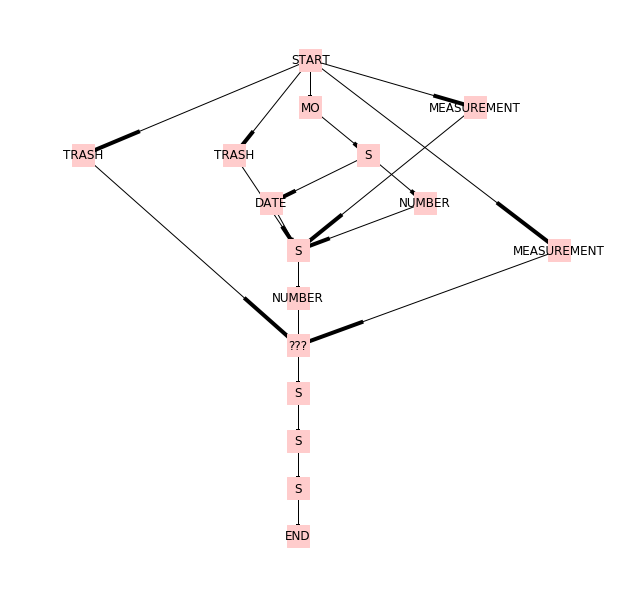

In [13]:
import networkx as nx
from estnltk.spans import Span
from estnltk.layer_operations.consecutive import iterate_consecutive_spans
from estnltk.finite_grammar.trees import Node, plot_graph, parse_graph, START, END, add_blanks


convert = {'measurement_object': 'MO',
           'space': 'S',
           'number': 'NUMBER',
           'unit':'???',
           'trash':'TRASH'
          }

def node_from_span(span):
    if span.layer:
        if span.layer.name == 'type':
            name = convert[span.regex_type]
        elif span.layer.name == 'dates':
            name = 'DATE'
    else:
        name = span.name    
    node = Node(name, span.start, span.end, spans=span)
    return node

graph = nx.DiGraph()

start_span = Span(-11, -10)
start_span.name = 'START'
end_span = Span(100000000, 100000001)
end_span.name = 'END'


def parse_text(text):
    graph = nx.DiGraph()
    spans = list(text.type) + list(text.dates) + [start_span, end_span]
    for a, b in iterate_consecutive_spans(spans):
        graph.add_edge( node_from_span(a), node_from_span(b))

    graph = parse_graph(graph, grammar, 10)
    print(text.text)
    plot_graph(graph)
    return graph

parse_text(tagged_lines[0])

In [14]:
import ipywidgets as widgets


text_selection = widgets.Dropdown(
    options=lines,
    description='Text:',
)

def observe(change):
    out.clear_output()
    with out:
        line = change['new']
        parse_text(lines_to_texts[line])


text_selection.observe(observe, names='value')

out = widgets.Output()

display(text_selection, out)

Dropdown(description='Text:', options=('PSA 03042012 - 0,83ng/ml perearsti poolt .', 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va', 'PSA 20105,99 ja 26.01.2012 uuesti .', 'PSA 2011 oli 0 , 4 nG7ml .', 'PSA 201222,25ng/ml', 'PSA 2 aastajooksuldünaamikata , eriuuring', ':psa 16,81! ! ! ! ! ,', 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )', 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a', 'Kolesterool 1k aastas .', 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni', 'Kontr Verekol 08.12a Per-le juurde .', 's vas munajuha kasvaja op , günekol 3a tagssi .', '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .', 'Rütmihäire tsüklipikkus 330 msek', 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.', 'Põhjendus: PALAT 10 # ALAT maksanäitaja', 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .', 'PSA 8,5( püsib aastaid selles väärtus', 'S , P-PSA 4.130( <4.100 µg/L )', 'PSA 5,2.', 'Kolesterool oli 7,9 mmol/l 0', 'kolesterool 6.4.', 'Kolesterool 5,2 mmol/l - esialgu dieet .', 'SK 3900 g , SP 51 cm .', 'Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .', 'Kehakaal 80,2 kg , KMI 25,9', 'S , P-NT-proBNP 668 ( <125 pg/mL ) S , P-Albumiin 43 ( 35 .. 52 g/L ) S , P-ALAT 25 ( <33 U/L )', 'PSA 6,5 ng/ml, eesnäärme maht67cm3', 'rjeldus : Siinusbradükardia Fr 587min'), value='PSA 03042012 - 0,83ng/ml perearsti poolt .')

Output()